In [1]:
import numpy as np
import torch
import pandas as pd
from torch.utils.data import Dataset, DataLoader
from torch import nn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [7]:
import sys
sys.path.append('C:/Users/Юрий/Desktop/jupiter/course_work')

from MNIST import data
train_mnist, val_mnist, test_mnist = data('fashion-mnist')

In [8]:
from Train import train, test

In [9]:
class MnistDatasetLinear(torch.utils.data.Dataset):
    def __init__(self, t_mnist):
        self.x=t_mnist.drop('label', axis=1).values
        self.y=t_mnist['label'].values
        
    def __len__(self):
        return len(self.x)
    
    def __getitem__(self, i):
        return {'sample': torch.tensor(self.x[i], dtype=torch.float), 'target': torch.tensor(self.y[i], dtype=torch.int64)}

In [10]:
train_set = MnistDatasetLinear(train_mnist)
test_set = MnistDatasetLinear(test_mnist)
val_set = MnistDatasetLinear(val_mnist)

In [11]:
train_loader = DataLoader(train_set, batch_size=64, shuffle=True)
test_loader = DataLoader(test_set, batch_size=64)
val_loader = DataLoader(val_set, batch_size=1024)

In [130]:
# class MnistLinearNN(nn.Module):
#     def __init__(self, in_features, num_classes, hidden_size, number_of_layers):
#         super().__init__()
#         self.model = nn.Sequential(
#             nn.Linear(in_features=in_features, out_features=hidden_size//number_of_layers),
#             nn.ReLU(),
#             nn.Linear(in_features=hidden_size//number_of_layers, out_features=num_classes),
#             #nn.LogSoftmax()
#         )

#     def forward(self, x):
#         return self.model(x)

In [12]:
class MnistLinearNN(nn.Module):
    def __init__(self, in_features, num_classes, hidden_size, number_of_layers):
        super(MnistLinearNN, self).__init__()
        layers = []
        layers.append(nn.Linear(in_features, hidden_size // number_of_layers))
        
        for i in range(number_of_layers - 1):
            layers.append(nn.Linear(hidden_size // number_of_layers, hidden_size // number_of_layers))
        layers.append(nn.Linear(hidden_size // number_of_layers, num_classes))
        
        self.layers = nn.ModuleList(layers)

    def forward(self, x):
        for layer in self.layers:
            x = torch.relu(layer(x))
        return x

In [13]:
IMG_SIZE = 28
NUM_CLASSES = 10
HIDDEN_SIZE = 1024
EPOCHS = 100

In [15]:
count_layers = np.array([ 1,  2, 3,  4, 5, 6, 7, 8, 9, 10, 12, 14])
results = []
for c in count_layers:
    model = MnistLinearNN(in_features=IMG_SIZE ** 2, num_classes=NUM_CLASSES, hidden_size=HIDDEN_SIZE, number_of_layers=c)
    optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
    criterion = nn.CrossEntropyLoss()
    val_loss_log, val_acc_log = train(model, criterion, optimizer, EPOCHS, train_loader, val_loader)
    loss_test, acc_test = test(model, criterion, test_loader)
    results.append([min(val_loss_log), max(val_acc_log), np.mean(loss_test), np.mean(acc_test)])
    print(f'loss = {np.mean(loss_test)}, accuracy = {np.mean(acc_test)}')

epoch = 1, loss = 0.8676635026931763, accuracy = 0.6956
epoch = 2, loss = 0.5774137377738953, accuracy = 0.8036
epoch = 3, loss = 0.5592327117919922, accuracy = 0.8054
epoch = 4, loss = 0.5507515072822571, accuracy = 0.8098
epoch = 5, loss = 0.5311630964279175, accuracy = 0.817
epoch = 6, loss = 0.5285398364067078, accuracy = 0.8168
epoch = 7, loss = 0.5327355265617371, accuracy = 0.8108
loss = 0.5162328481674194, accuracy = 0.816
epoch = 1, loss = 0.44055071473121643, accuracy = 0.8394
epoch = 2, loss = 0.34486979246139526, accuracy = 0.875
epoch = 3, loss = 0.3306867480278015, accuracy = 0.883
epoch = 4, loss = 0.3165551722049713, accuracy = 0.8808
epoch = 5, loss = 0.3192436099052429, accuracy = 0.887
loss = 0.32405227422714233, accuracy = 0.885
epoch = 1, loss = 0.43953651189804077, accuracy = 0.8378
epoch = 2, loss = 0.3851906955242157, accuracy = 0.8568
epoch = 3, loss = 0.34695178270339966, accuracy = 0.8728
epoch = 4, loss = 0.3343370854854584, accuracy = 0.88
epoch = 5, loss =

In [16]:
results

[[0.52853984, 0.817, 0.51623285, 0.816],
 [0.31655517, 0.887, 0.32405227, 0.885],
 [0.31735507, 0.883, 0.33093166, 0.8774],
 [0.31968135, 0.8832, 0.33271915, 0.8768],
 [1.2477072, 0.572, 1.2874746, 0.5588],
 [0.6058086, 0.7756, 0.6447826, 0.7678],
 [1.9389862, 0.2916, 1.9642518, 0.2962],
 [2.3025851, 0.098, 2.3025851, 0.102],
 [2.3025851, 0.098, 2.3025851, 0.102],
 [2.3025851, 0.098, 2.3025851, 0.102],
 [2.3025851, 0.098, 2.3025851, 0.102],
 [2.3025851, 0.098, 2.3025851, 0.102]]

In [17]:
val_loss = [row[0] for row in results]
val_acc = [row[1] for row in results]
test_loss = [row[2] for row in results]
test_acc = [row[3] for row in results]

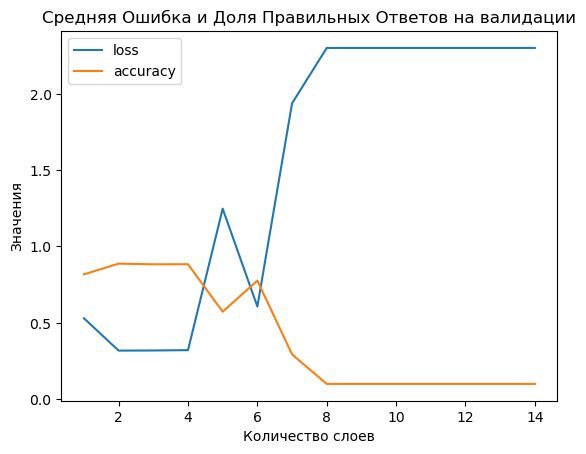

In [18]:
plt.plot([ 1,  2, 3,  4, 5, 6, 7, 8, 9, 10, 12, 14], val_loss, label = 'loss')
plt.plot([ 1,  2, 3,  4, 5, 6, 7, 8, 9, 10, 12, 14], val_acc, label = 'accuracy')
plt.xlabel('Количество слоев') 
plt.ylabel('Значения')
plt.title('Средняя Ошибка и Доля Правильных Ответов на валидации')
plt.legend()

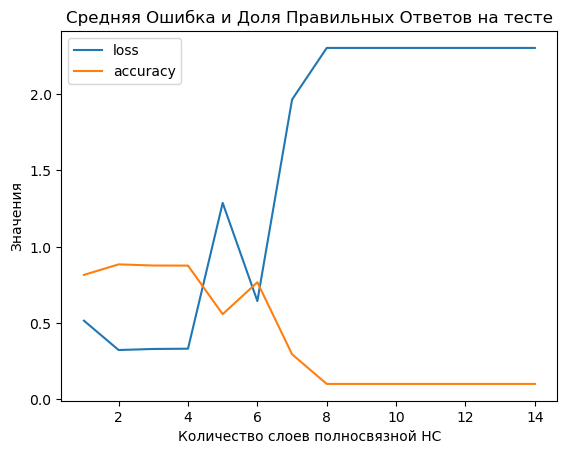

In [19]:
plt.plot([ 1,  2, 3,  4, 5, 6, 7, 8, 9, 10, 12, 14], test_loss, label = 'loss')
plt.plot([ 1,  2, 3,  4, 5, 6, 7, 8, 9, 10, 12, 14], test_acc, label = 'accuracy')
plt.xlabel('Количество слоев полносвязной НС') 
plt.ylabel('Значения')
plt.title('Средняя Ошибка и Доля Правильных Ответов на тесте')
plt.legend()

In [ ]:
plt.plot()

In [9]:
model = MnistLinearNN(in_features=IMG_SIZE ** 2, num_classes=NUM_CLASSES, hidden_size=HIDDEN_SIZE, number_of_layers=2)

In [10]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
criterion = nn.CrossEntropyLoss()

In [11]:
info = model.compile

In [12]:
val_loss_log, val_acc_log = train(model, criterion, optimizer, EPOCHS, train_loader, val_loader)

epoch = 1, loss = 0.19941529631614685, accuracy = 0.9404
epoch = 2, loss = 0.1301908940076828, accuracy = 0.9584
epoch = 3, loss = 0.10656626522541046, accuracy = 0.967
epoch = 4, loss = 0.09574859589338303, accuracy = 0.9682
epoch = 5, loss = 0.07922220230102539, accuracy = 0.9748
epoch = 6, loss = 0.0716555044054985, accuracy = 0.9752
epoch = 7, loss = 0.07014952600002289, accuracy = 0.9766
epoch = 8, loss = 0.07093263417482376, accuracy = 0.9764


In [22]:
loss_test, acc_test = test(model, criterion, test_loader)

print(f'loss = {np.mean(loss_test)}, accuracy = {np.mean(acc_test)}')

loss = 0.07567625492811203, accuracy = 0.9752


In [23]:
val_loss_log, val_acc_log

([0.1994153,
  0.1301909,
  0.106566265,
  0.095748596,
  0.0792222,
  0.071655504,
  0.070149526,
  0.070932634],
 [0.9404, 0.9584, 0.967, 0.9682, 0.9748, 0.9752, 0.9766, 0.9764])

In [25]:
np.mean(loss_test), np.mean(acc_test)

(0.075676255, 0.9752)